In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LinearRegression
import math
mpl.rcParams['figure.dpi']= 300

**Gráfica de los datos obtenidos experimentalmente**

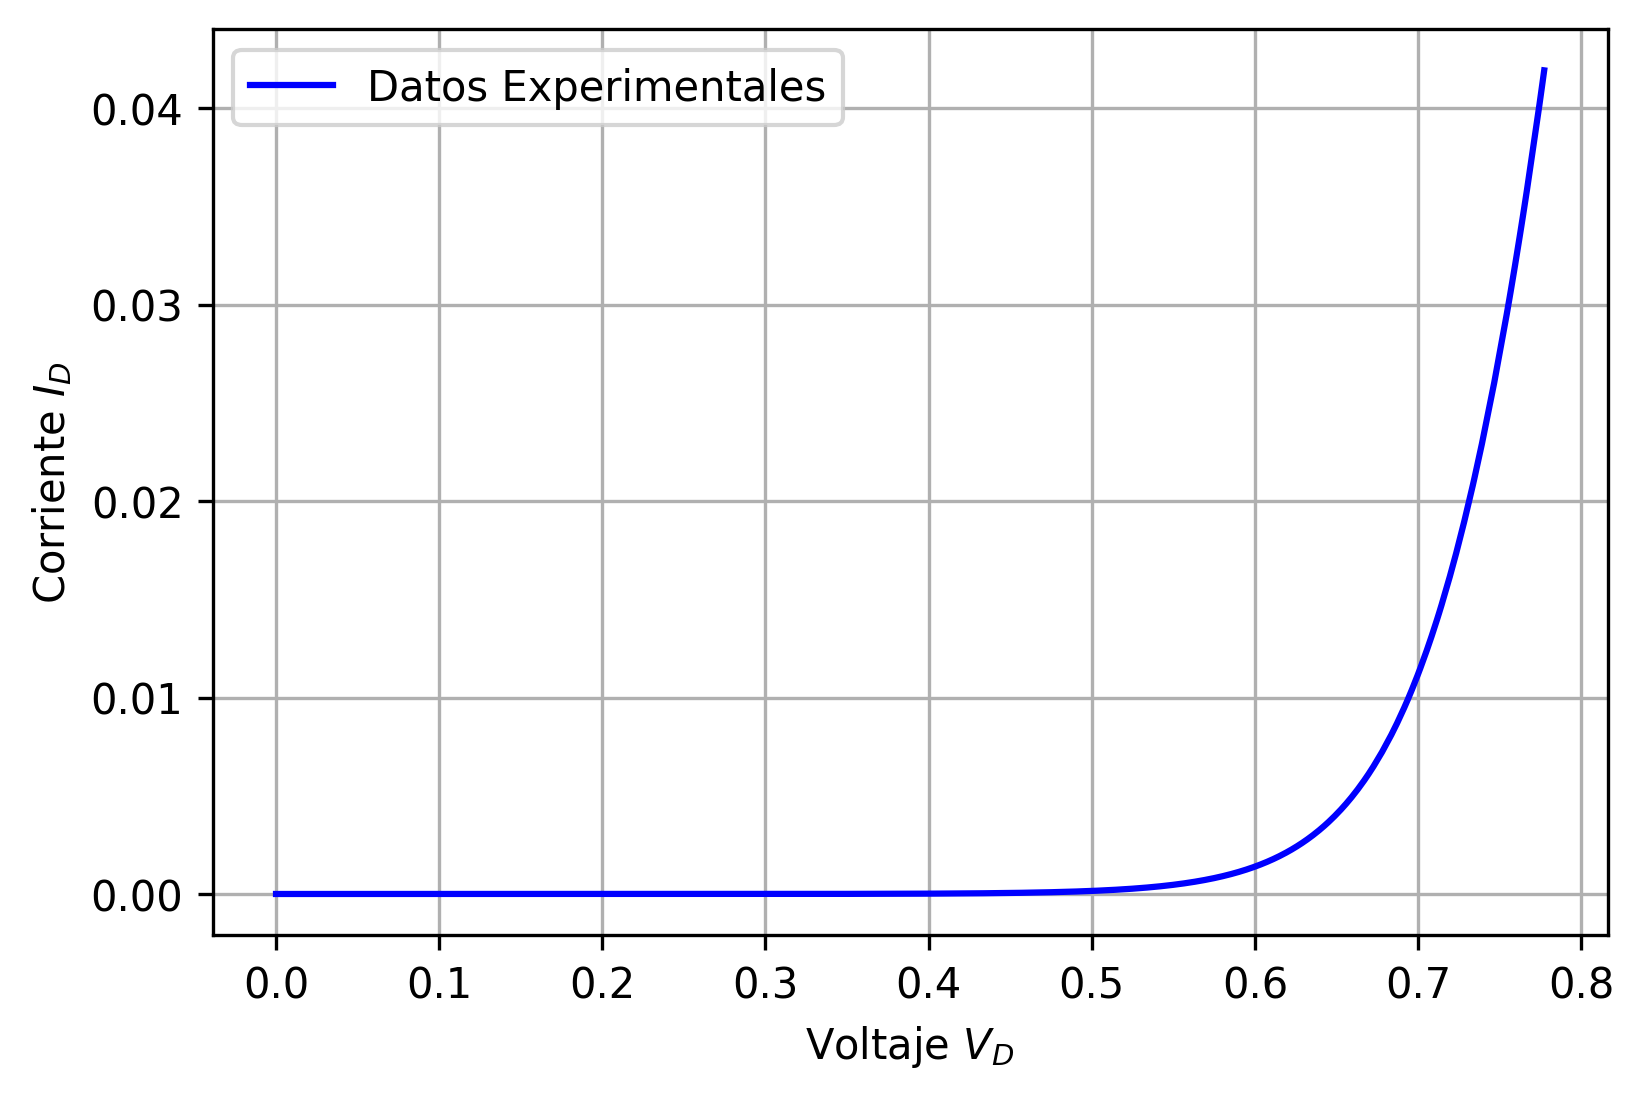

V_D [9.999878e-05 1.999976e-04 2.999963e-04 ... 7.772713e-01 7.772720e-01
 7.772728e-01]
I_D [5.567196e-12 1.114669e-11 1.673851e-11 ... 4.192058e-02 4.192103e-02
 4.192149e-02]
V_F [1.0000e-04 2.0000e-04 3.0000e-04 ... 9.9998e+00 9.9999e+00 1.0000e+01]
(100000,)


In [ ]:
data = np.genfromtxt('/content/1N4148_2')
plt.plot(data[:,1], data[:,2],'b')
V_D = data[2:,1]
I_D = data[2:,2]
V_F = data[2:,0]
plt.xlabel('Voltaje $V_D$')
plt.ylabel('Corriente $I_D$')
plt.legend(['Datos Experimentales'])
plt.grid()
plt.show()
print('V_D',V_D)
print('I_D',I_D)
print('V_F',V_F)
print(I_D.shape)

**Modelo Exponencial**

Fórmula a Utilizar:\
$nV_T=\frac{V_{D2}-V_{D1}}{\log\frac{I_2}{I_1}}$


In [ ]:
num = V_D.shape[0]
voltage_dif = np.zeros(num-1)
current_prop = np.zeros(num-1)

for i in range (0,num-1):
  voltage_dif[i] = V_D[i+1]-V_D[i]
  current_prop[i] = np.log(I_D[i+1]/I_D[i])
print(voltage_dif)
print(current_prop)
print(voltage_dif.shape[0])

[9.999882e-05 9.999870e-05 9.999880e-05 ... 7.000000e-07 7.000000e-07
 8.000000e-07]
[6.94251077e-01 4.06569460e-01 2.88786698e-01 ... 1.07346419e-05
 1.07345267e-05 1.09729526e-05]
99999


In [ ]:
real_voltage_dif = voltage_dif[:num-1]
real_current_prop = current_prop[:num-1]
print(real_voltage_dif)
print(real_current_prop)

[9.999882e-05 9.999870e-05 9.999880e-05 ... 7.000000e-07 7.000000e-07
 8.000000e-07]
[6.94251077e-01 4.06569460e-01 2.88786698e-01 ... 1.07346419e-05
 1.07345267e-05 1.09729526e-05]


In [ ]:
nV_T = real_voltage_dif/real_current_prop
print('nV_T: ',nV_T)

nV_T:  [0.00014404 0.00024596 0.00034627 ... 0.06520944 0.06521014 0.07290654]


In [ ]:
T = 300
K = 1.3806488e-23
q = 1.602e-19
V_T = (K*T)/q
n = n
n_mean = np.mean(n)
var_coef = (np.std(n)/np.mean(n))*100
print('V_T:',V_T)
print('n:',n)
print('Promedio de n:',n_mean)
print('Desv. Estándar de n:',np.std(n))
print('Var. Coef:',var_coef,'%')

V_T: 0.02585484644194757
n: [1.72261951 1.7229328  1.70605254 ... 1.8312305  1.46499987 1.83126918]
Promedio de n: 1.7391397196502756
Desv. Estándar de n: 0.10490534699749066
Var. Coef: 6.032025248585899 %


Fórmula para $I_S$:\
$I_S=\frac{I_D}{\exp(\frac{V_D}{nV_T})}$


In [ ]:
I_S = I_D[:num-1]/(np.exp(V_D[:num-1]/nV_T))
var_coef_I_S = (np.std(I_S)/np.mean(I_S))*100
I_S_mean = np.mean(I_S)
I_S_std = np.std(I_S)
print('Corriente de Sat:',I_S)
print('Promedio de I_S:',I_S_mean)
print('Desv. Estándar de I_S:',I_S_std)
print('Var. Coef I_S:',var_coef_I_S,'%')

Corriente de Sat: [2.78052766e-12 4.94315040e-12 7.03819854e-12 ... 2.79129118e-07
 2.79164835e-07 9.82487014e-07]
Promedio de I_S: 1.3615720064056213e-07
Desv. Estándar de I_S: 2.2452908954961254e-07
Var. Coef I_S: 164.90430803020183 %


In [ ]:
I_D_m3 = I_S_mean*np.exp(V_D/(n_mean*V_T))
error = np.abs((I_D-I_D_m3)/I_D)*100
print('M. Exponencial Corriente:',I_D_m3)
print('Error(%):',error)

M. Exponencial Corriente: [1.36460340e-07 1.36764154e-07 1.37068644e-07 ... 4.37808497e+00
 4.37815312e+00 4.37823102e+00]
Error(%): [2451050.26829727 1226848.57189143  818781.99062422 ...   10343.7604767
   10343.81095226   10343.88216454]


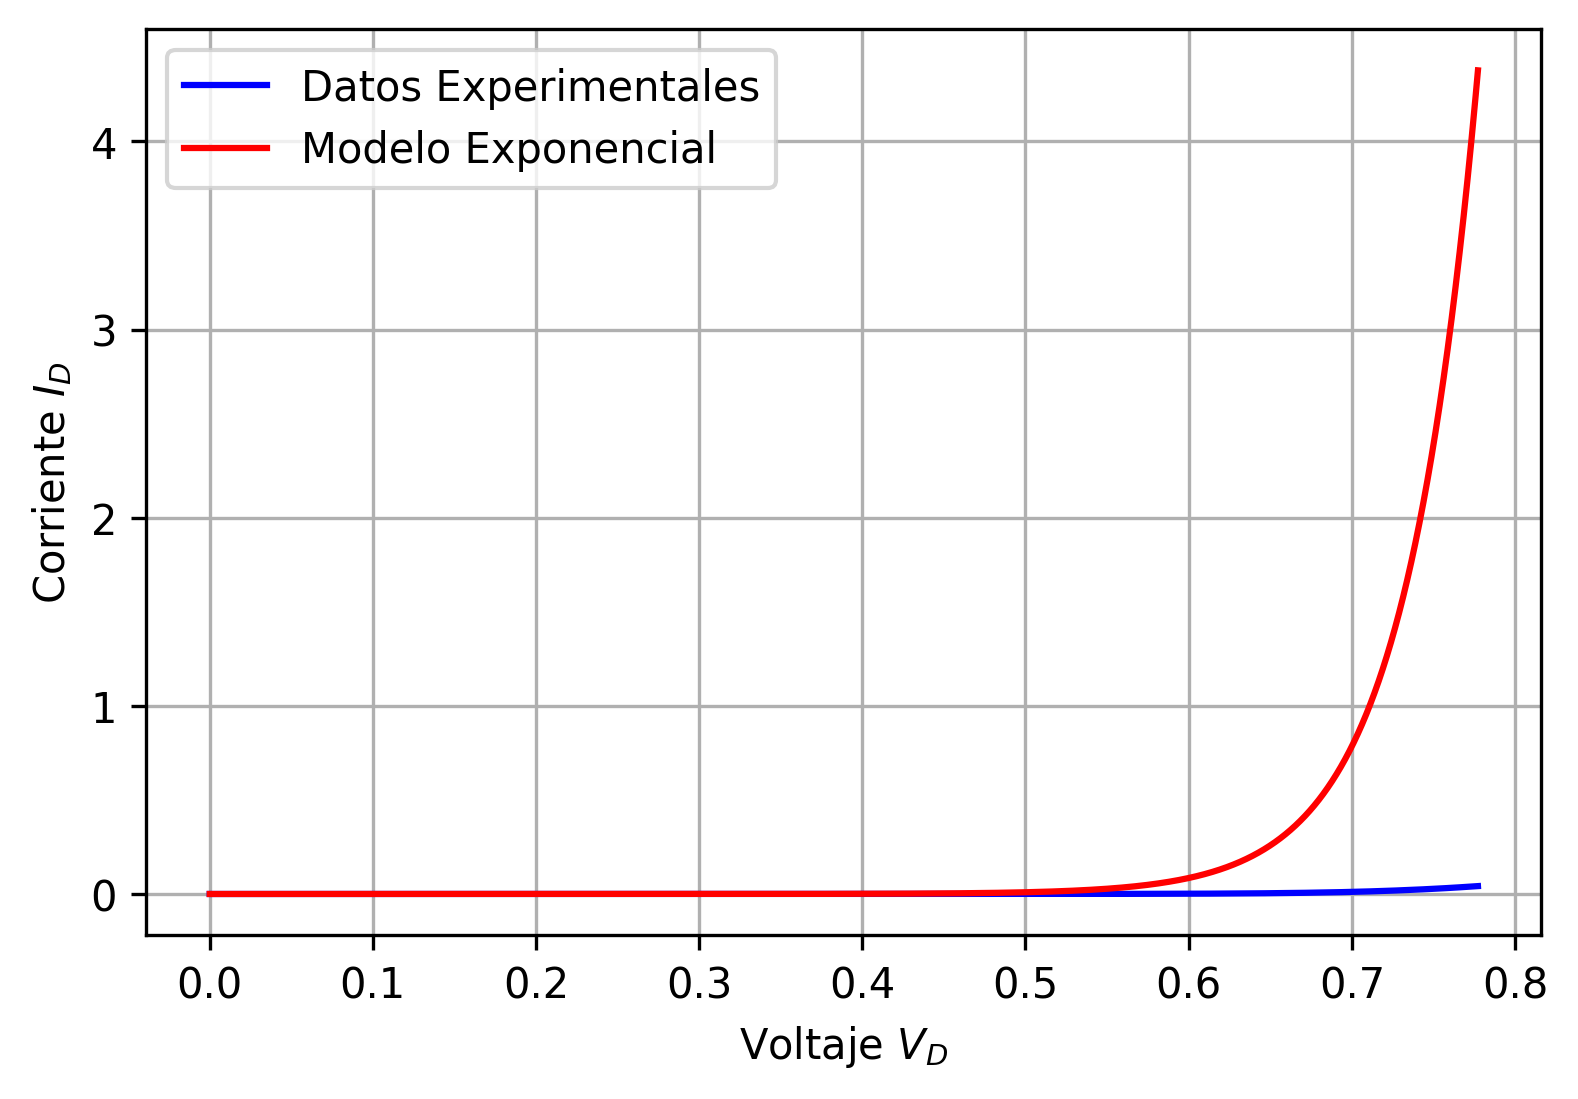

In [ ]:
plt.plot(V_D[:num-1],I_D[:num-1],'b')
plt.plot(V_D[:num-1],I_D_m3[:num-1],'r')
plt.xlabel('Voltaje $V_D$')
plt.ylabel('Corriente $I_D$')
plt.legend(['Datos Experimentales','Modelo Exponencial'])
plt.grid()
plt.show()

**Modelo de Caida de Voltaje Constante**

El voltaje VD0 es igual a: 0.6912823591761139
La ecuación es:
I_D =  0.47641565742925707 V_D  -0.3293377396161361
El coeficiente de correlación R es: 99.74282872090889 %


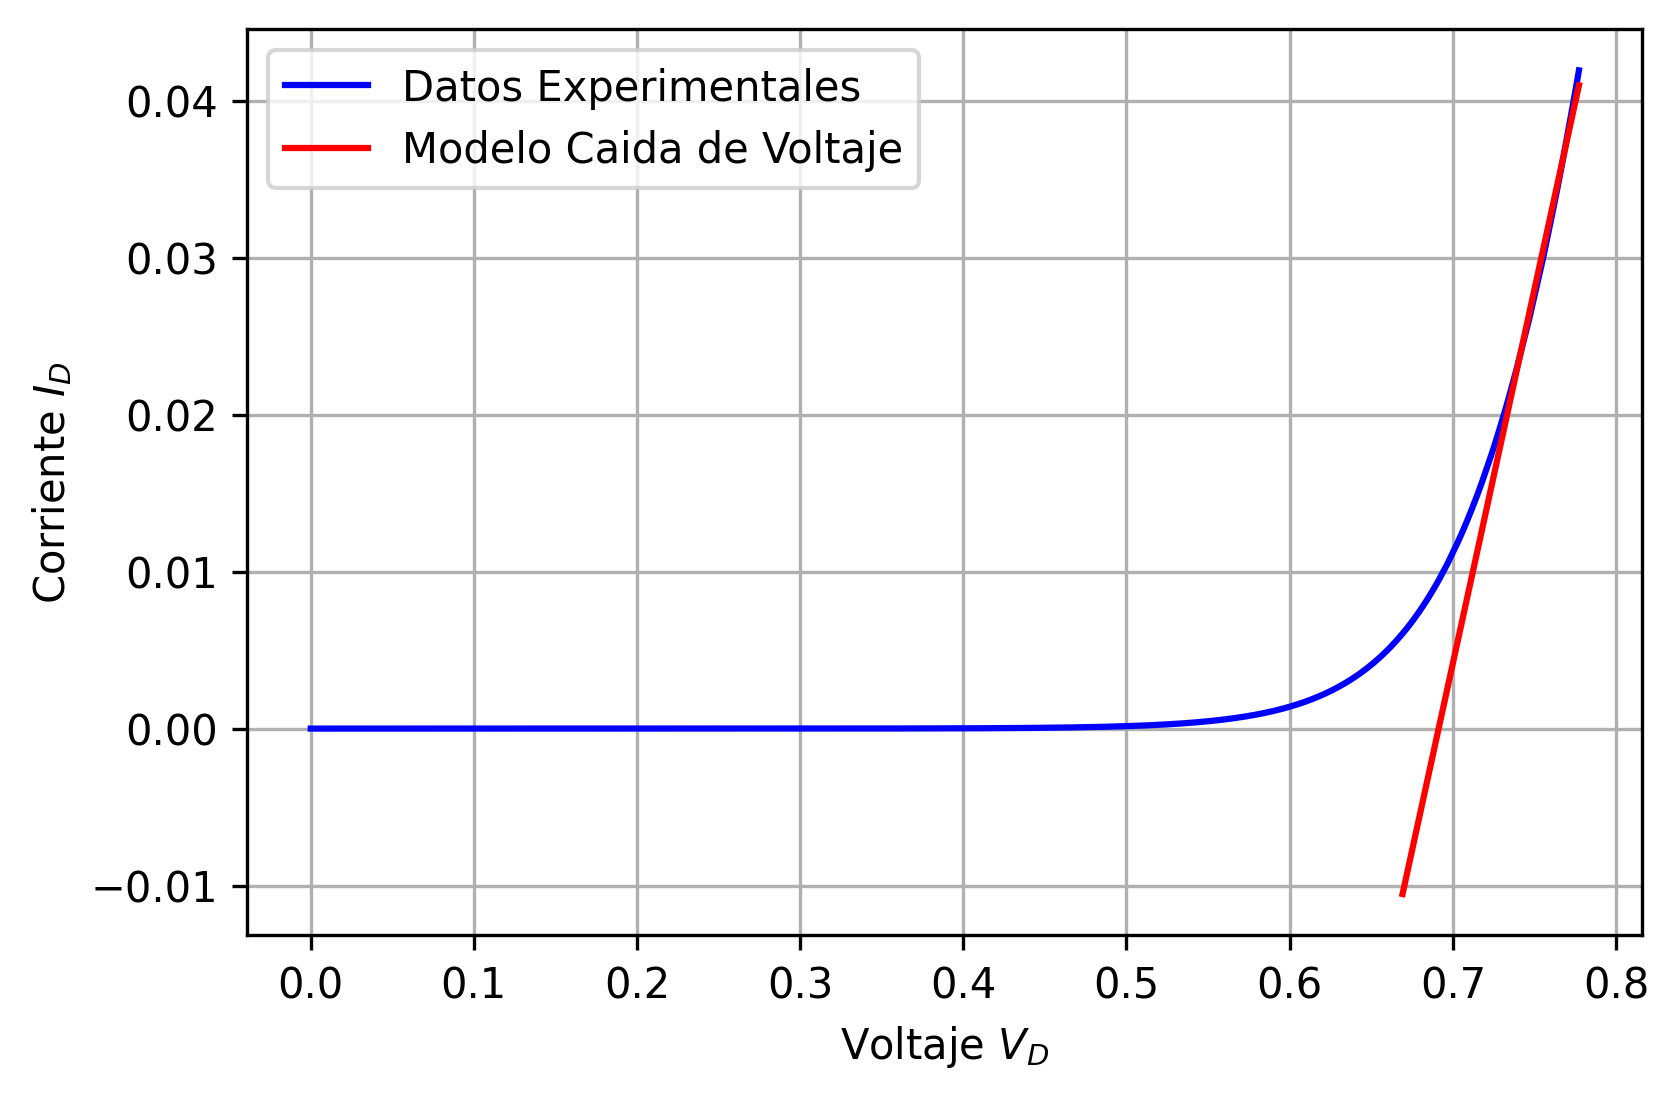

In [ ]:
d = 50000
d1 = 20000
ones = np.ones(num-d)
X1 = np.transpose(np.vstack((ones,V_D[d-1:num-1])))
Y1 = I_D[d-1:num-1]
X1T = np.transpose(X1)

X1TX1 = np.dot(X1T,X1)
inv1 = np.linalg.inv(X1TX1)
X1TY = np.dot(X1T,Y1)

R = np.dot(inv1,X1TY)
B1 = R[1]
A1 = R[0]

I_D_m1 = (B1*V_D[d1-1:num-1]) + A1

VD01 = -A1/B1

x=V_D[d-1:num-1].reshape((-1,1))
y=I_D[d-1:num-1].reshape((-1,1))
model = LinearRegression()
model.fit(x,y)
cR = model.score(x,y)

print('El voltaje VD0 es igual a:',VD01)
print('La ecuación es:')
print('I_D = ',B1,'V_D ',A1)
print('El coeficiente de correlación R es:',(math.sqrt(cR))*100,'%')

plt.plot(V_D[:num-1],I_D[:num-1],'b')
plt.plot(V_D[d1-1:num-1],I_D_m1[:num-d1],'r')
plt.xlabel('Voltaje $V_D$')
plt.ylabel('Corriente $I_D$')
plt.legend(['Datos Experimentales','Modelo Caida de Voltaje'])
plt.grid()
plt.show()

**Modelo de Caida de Voltaje Constante + Resistor**


Fórmula para $m$:\
$m = \frac{1}{r_D}$


El valor de la resistencia r_D es: 2.099007420108752
El valor del voltaje VD0 es: 0.6912823591761139
La ecuación es:
V_D =  2.099007420108752 I_D + 0.6912823591761139


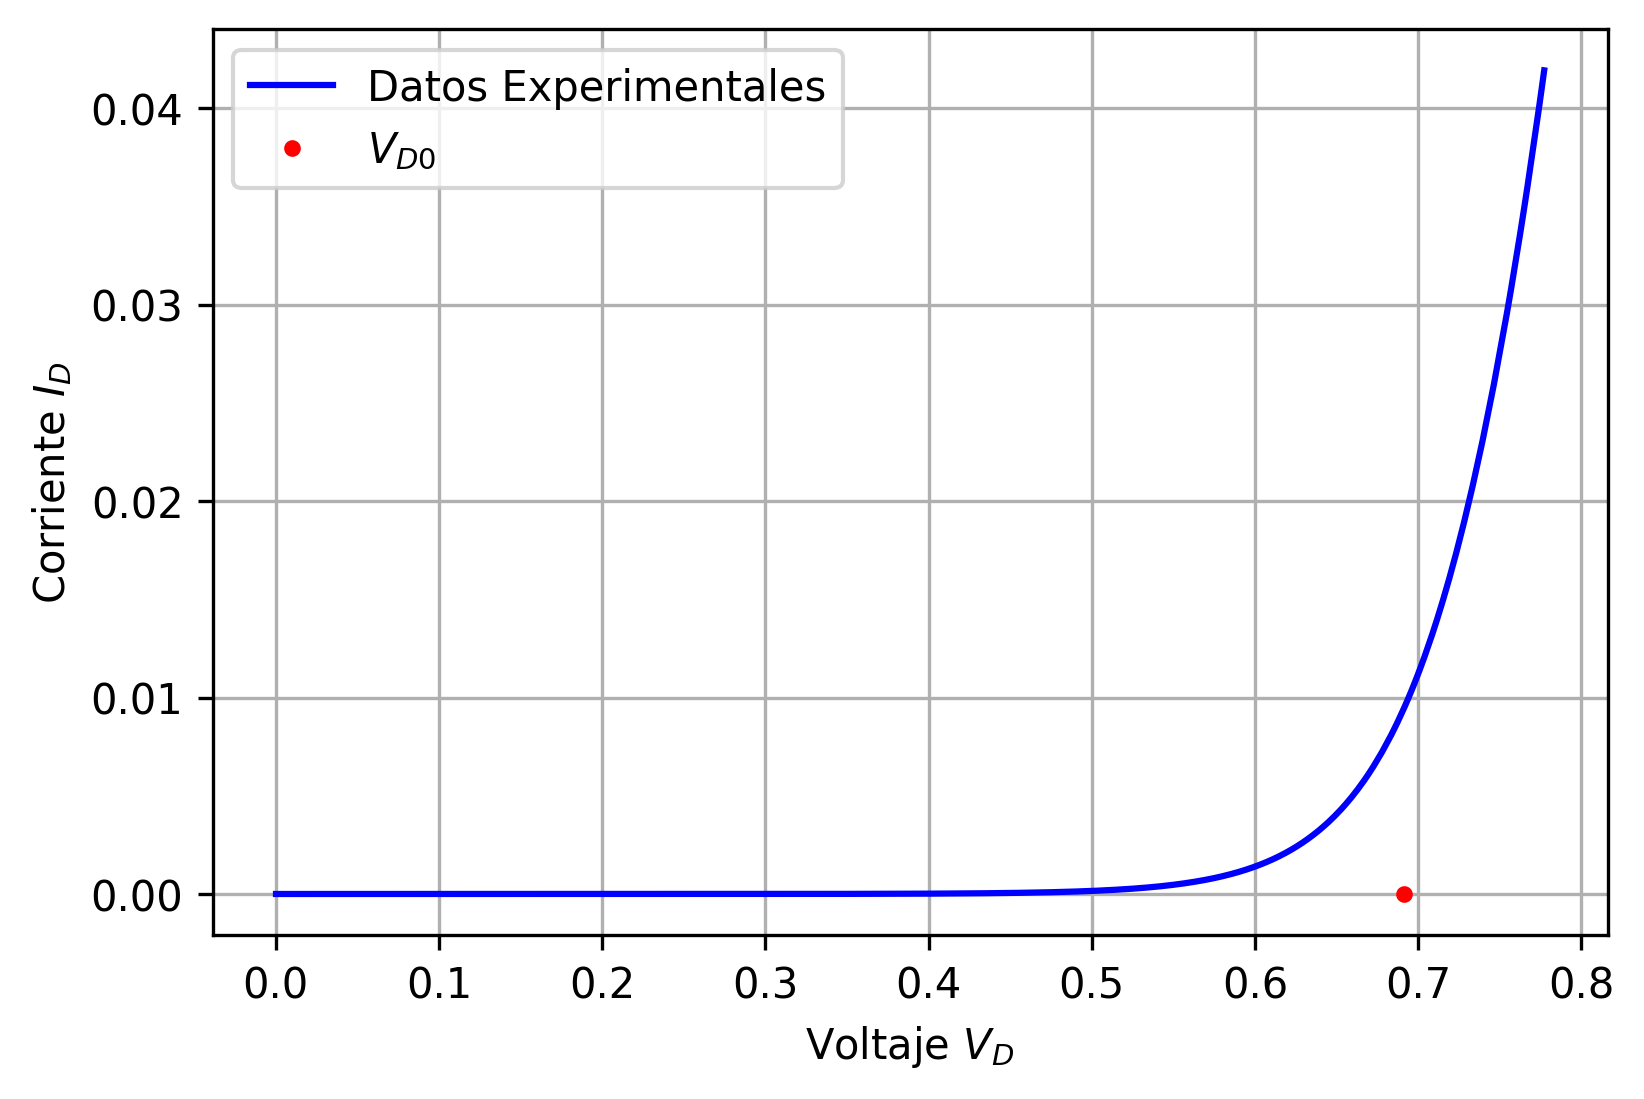

In [ ]:
r_D = 1/B1
print('El valor de la resistencia r_D es:',r_D)

VD0 = -A1/B1
print('El valor del voltaje VD0 es:',VD0)

print('La ecuación es:')
print('V_D = ',r_D,'I_D +',VD0)

plt.plot(V_D[:num-1],I_D[:num-1],'b')
plt.plot(VD0,0,'.r')
plt.xlabel('Voltaje $V_D$')
plt.ylabel('Corriente $I_D$')
plt.legend(['Datos Experimentales','$V_{D0}$'])
plt.grid()
plt.show()